In [12]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import rcParams
from prettytable import PrettyTable

%matplotlib inline

In [14]:
TEXT_COLOUR = {
    'PURPLE':'\033[95m',
    'CYAN':'\033[96m',
    'DARKCYAN':'\033[36m',
    'BLUE':'\033[94m',
    'GREEN':'\033[92m',
    'YELLOW':'\033[93m',
    'RED':'\033[91m',
    'BOLD':'\033[1m',
    'UNDERLINE':'\033[4m',
    'END':'\033[0m'
}

def print_bold(*msgs):
    print(TEXT_COLOUR['BOLD'])
    print(*msgs)
    print(TEXT_COLOUR['END'])

def print_green(*msgs):
    print(TEXT_COLOUR['GREEN'])
    print(*msgs)
    print(TEXT_COLOUR['END'])

def print_error(*msgs):
    print(TEXT_COLOUR['RED'])
    print(*msgs)
    print(TEXT_COLOUR['END'])

def wrap_green(msg):
    return TEXT_COLOUR['GREEN'] + msg + TEXT_COLOUR['END']

def wrap_red(msg):
    return TEXT_COLOUR['RED'] + msg + TEXT_COLOUR['END']

def up_down_str(val):
    msg = str(val)
    if val > 0:
        msg = wrap_green(msg)
    elif val < 0:
        msg = wrap_red(msg)
    return msg

In [15]:
dataset = 'MRPC'
num_layer = 12
num_heads = 12

In [16]:
color_dict = {
            0 :'r',
            1 :'g',
            2 :'b',
            3 :'y',
            4 :'cyan',
            5 :'magenta',
            6 :'black',
            7 :'grey',
            8 :'orange',
            9 :'purple',
            10 :'navy',
            11 :'pink'
        }

In [17]:
def display_plot(image1):
    # read images
    img_A = mpimg.imread(image1)

    # display images
    fig, ax = plt.subplots(1,1 ,figsize=(10,10))
    ax.imshow(img_A);
    ax.axis('off')
    plt.show()

In [18]:
def display_side_by_side(image1, image2):
    # read images
    img_A = mpimg.imread(image1)
    img_B = mpimg.imread(image2)

    # display images
    fig, ax = plt.subplots(1,2 ,figsize=(15,15))
    ax[0].imshow(img_A);
    ax[0].axis('off')
    ax[1].imshow(img_B);
    ax[1].axis('off')

In [19]:
def plot_head_relation(exclude_diff, keep_diff):
    fig, ax = plt.subplots(1,1 ,figsize=(5,5))

    # Shrink current axis's height by 10% on the bottom
    box = ax.get_position()
    ax.set_position([box.x0, box.y0 + box.height * 0.2,
                     box.width, box.height * 0.85])
    
    for ind, (exclude, keep) in enumerate(zip(exclude_diff, keep_diff)):
        scatter = ax.scatter(exclude, keep, c=color_dict[ind], label=ind, s=30)
    
#     lgd = ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.10), title="Heads", ncol=int(len(exclude_diff)/2), prop={'size': 10})
#     for handle in lgd.legendHandles:
#         handle.set_sizes([100.0])

    exclude_min_val = np.min(exclude_diff)
    exclude_max_val = np.max(exclude_diff)    
    exclude_margin = (exclude_max_val - exclude_min_val) / 5
    
    exclude_min_val = exclude_min_val - exclude_margin
    exclude_max_val = exclude_max_val + exclude_margin

    ax.set_xlim((exclude_min_val, exclude_max_val))
    ax.set_xlabel("excluding one")
    
    keep_min_val = np.min(keep_diff)
    keep_max_val = np.max(keep_diff)
    keep_margin = (keep_max_val - keep_min_val) / 5
    
    keep_min_val = keep_min_val - keep_margin
    keep_max_val = keep_max_val + keep_margin

    ax.set_ylim((keep_min_val, keep_max_val))
    ax.set_ylabel("keeping one")

    ax.axvline(x=0, ls="--", c=".3")
    ax.axhline(y=0, ls="--", c=".3")
    
    plt.xticks(rotation=90)
    
    plt.show()

In [20]:
def plot_all_relation(exclude_diff, keep_diff):
    fig, ax = plt.subplots(1,1 ,figsize=(7,7))

    # Shrink current axis's height by 10% on the bottom
    box = ax.get_position()
    ax.set_position([box.x0, box.y0 + box.height * 0.2,
                     box.width, box.height * 0.85])
    
    for ind, (exclude, keep) in enumerate(zip(exclude_diff, keep_diff)):
        scatter = ax.scatter(exclude, keep, label=ind, c=color_dict[ind], s=30)
    
    lgd = ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.20), title="Layers", ncol=int(len(exclude_diff)/2), prop={'size': 10})
    for handle in lgd.legendHandles:
        handle.set_sizes([100.0])

    exclude_min_val = np.min(exclude_diff)
    exclude_max_val = np.max(exclude_diff)    
    exclude_margin = (exclude_max_val - exclude_min_val) / 5
    
    exclude_min_val = exclude_min_val - exclude_margin
    exclude_max_val = exclude_max_val + exclude_margin

    ax.set_xlim((exclude_min_val, exclude_max_val))
    ax.set_xlabel("excluding one")
    
    keep_min_val = np.min(keep_diff)
    keep_max_val = np.max(keep_diff)
    keep_margin = (keep_max_val - keep_min_val) / 5
    
    keep_min_val = keep_min_val - keep_margin
    keep_max_val = keep_max_val + keep_margin

    ax.set_ylim((keep_min_val, keep_max_val))
    ax.set_ylabel("keeping one")

    ax.axvline(x=0, ls="--", c=".3")
    ax.axhline(y=0, ls="--", c=".3")
    
    plt.xticks(rotation=90)
    
    plt.show()

### following plots are generated with test set
### fine-tuned models are finetuned using train set
### seed is fixed

# < Heads ablation experiments >

## 1. removing single head vs keeping only single head for each layer

In [21]:
f=open(f"../ablation_results/1/{dataset}/ablation_results.txt", "r")
c1_acc = f.read().splitlines()

f=open(f"../ablation_results/1/{dataset}/reverse_ablation_results.txt", "r")
c11_acc = f.read().splitlines()

f=open(f"../ablation_results/2/{dataset}/ablation_results.txt", "r")
c2_acc = f.read().splitlines()

f=open(f"../ablation_results/2/{dataset}/reverse_ablation_results.txt", "r")
c10_acc = f.read().splitlines()

f=open(f"../ablation_results/mask_all/{dataset}/ablation_results.txt", "r")
masked_acc = f.read().splitlines()

base_acc = round(float(c1_acc[0]),5)
print(f"BASE MCC : {base_acc}")

c1_acc = c1_acc[1:]
c2_acc = c2_acc[1:]
c10_acc = c10_acc[1:]
c11_acc = c11_acc[1:]
masked_acc = masked_acc[1:]

print(len(c1_acc))
print(len(c11_acc))

print(len(c2_acc))
print(len(c10_acc))

print(len(masked_acc))

BASE MCC : 0.90785
144
144
792
792
12




< LAYER 0 >


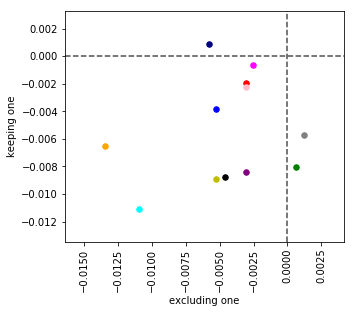

	head	ablating	keeping
	0	-0.00309 	-0.00193
	1	0.00062 	-0.00803
	2	-0.00529 	-0.00384
	3	-0.00529 	-0.00890
	4	-0.01094 	-0.01105
	5	-0.00251 	-0.00067
	6	-0.00462 	-0.00873
	7	0.00124 	-0.00575
	8	-0.01348 	-0.00649
	9	-0.00309 	-0.00838
	10	-0.00582 	0.00092
	11	-0.00309 	-0.00226
	avg	-0.00461 	-0.00543


< LAYER 1 >


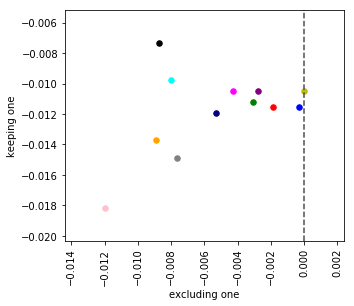

	head	ablating	keeping
	0	-0.00187 	-0.01154
	1	-0.00309 	-0.01118
	2	-0.00032 	-0.01154
	3	-0.00000 	-0.01046
	4	-0.00802 	-0.00975
	5	-0.00430 	-0.01046
	6	-0.00870 	-0.00733
	7	-0.00767 	-0.01487
	8	-0.00890 	-0.01373
	9	-0.00277 	-0.01046
	10	-0.00529 	-0.01191
	11	-0.01198 	-0.01817
	avg	-0.00524 	-0.01178


< LAYER 2 >


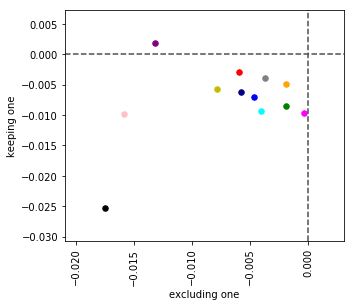

	head	ablating	keeping
	0	-0.00596 	-0.00301
	1	-0.00187 	-0.00852
	2	-0.00462 	-0.00701
	3	-0.00785 	-0.00569
	4	-0.00407 	-0.00935
	5	-0.00032 	-0.00969
	6	-0.01753 	-0.02529
	7	-0.00374 	-0.00388
	8	-0.00187 	-0.00484
	9	-0.01320 	0.00185
	10	-0.00582 	-0.00616
	11	-0.01586 	-0.00982
	avg	-0.00689 	-0.00762


< LAYER 3 >


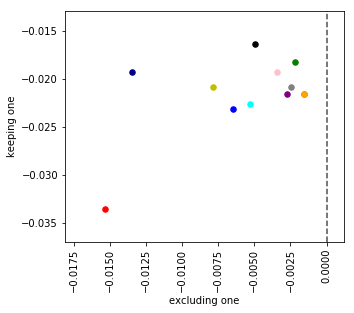

	head	ablating	keeping
	0	-0.01534 	-0.03353
	1	-0.00219 	-0.01823
	2	-0.00649 	-0.02310
	3	-0.00785 	-0.02081
	4	-0.00529 	-0.02266
	5	-0.00155 	-0.02156
	6	-0.00495 	-0.01632
	7	-0.00244 	-0.02086
	8	-0.00155 	-0.02160
	9	-0.00277 	-0.02156
	10	-0.01348 	-0.01933
	11	-0.00341 	-0.01933
	avg	-0.00561 	-0.02157


< LAYER 4 >


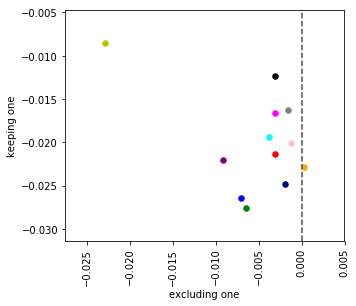

	head	ablating	keeping
	0	-0.00309 	-0.02129
	1	-0.00649 	-0.02757
	2	-0.00701 	-0.02643
	3	-0.02289 	-0.00852
	4	-0.00374 	-0.01935
	5	-0.00309 	-0.01662
	6	-0.00309 	-0.01238
	7	-0.00155 	-0.01624
	8	0.00031 	-0.02283
	9	-0.00920 	-0.02209
	10	-0.00187 	-0.02478
	11	-0.00123 	-0.02013
	avg	-0.00524 	-0.01985


< LAYER 5 >


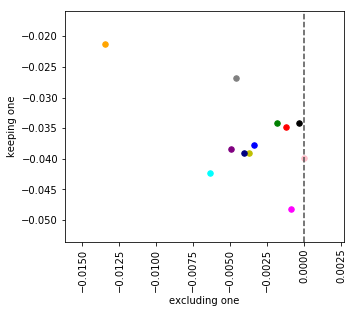

	head	ablating	keeping
	0	-0.00123 	-0.03486
	1	-0.00187 	-0.03420
	2	-0.00341 	-0.03781
	3	-0.00374 	-0.03906
	4	-0.00635 	-0.04229
	5	-0.00091 	-0.04811
	6	-0.00032 	-0.03420
	7	-0.00462 	-0.02686
	8	-0.01348 	-0.02118
	9	-0.00495 	-0.03844
	10	-0.00407 	-0.03906
	11	-0.00000 	-0.03986
	avg	-0.00375 	-0.03633


< LAYER 6 >


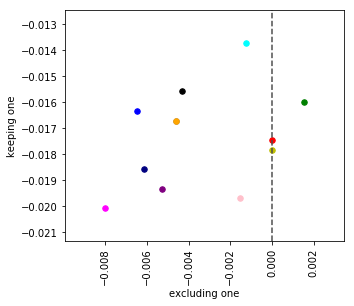

	head	ablating	keeping
	0	-0.00000 	-0.01748
	1	0.00155 	-0.01600
	2	-0.00649 	-0.01636
	3	-0.00000 	-0.01785
	4	-0.00123 	-0.01373
	5	-0.00802 	-0.02008
	6	-0.00430 	-0.01559
	7	-0.00462 	-0.01673
	8	-0.00462 	-0.01673
	9	-0.00529 	-0.01933
	10	-0.00616 	-0.01859
	11	-0.00155 	-0.01970
	avg	-0.00339 	-0.01735


< LAYER 7 >


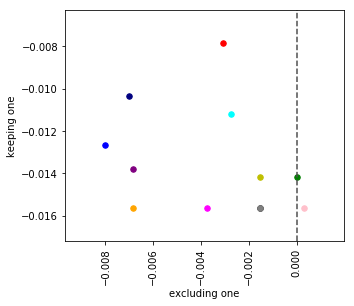

	head	ablating	keeping
	0	-0.00309 	-0.00785
	1	-0.00000 	-0.01416
	2	-0.00802 	-0.01268
	3	-0.00155 	-0.01416
	4	-0.00277 	-0.01118
	5	-0.00374 	-0.01564
	6	-0.00155 	-0.01564
	7	-0.00155 	-0.01564
	8	-0.00683 	-0.01564
	9	-0.00683 	-0.01381
	10	-0.00701 	-0.01037
	11	0.00031 	-0.01564
	avg	-0.00355 	-0.01353


< LAYER 8 >


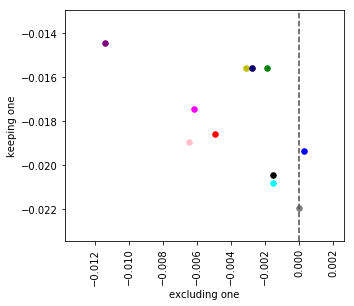

	head	ablating	keeping
	0	-0.00495 	-0.01859
	1	-0.00187 	-0.01559
	2	0.00031 	-0.01934
	3	-0.00309 	-0.01559
	4	-0.00155 	-0.02083
	5	-0.00616 	-0.01746
	6	-0.00155 	-0.02046
	7	-0.00000 	-0.02194
	8	-0.00277 	-0.01559
	9	-0.01142 	-0.01445
	10	-0.00277 	-0.01559
	11	-0.00649 	-0.01896
	avg	-0.00353 	-0.01787


< LAYER 9 >


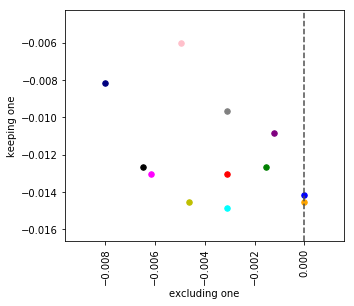

	head	ablating	keeping
	0	-0.00309 	-0.01303
	1	-0.00155 	-0.01268
	2	-0.00000 	-0.01416
	3	-0.00462 	-0.01452
	4	-0.00309 	-0.01487
	5	-0.00616 	-0.01303
	6	-0.00649 	-0.01268
	7	-0.00309 	-0.00969
	8	-0.00000 	-0.01452
	9	-0.00123 	-0.01084
	10	-0.00802 	-0.00818
	11	-0.00495 	-0.00602
	avg	-0.00352 	-0.01202


< LAYER 10 >


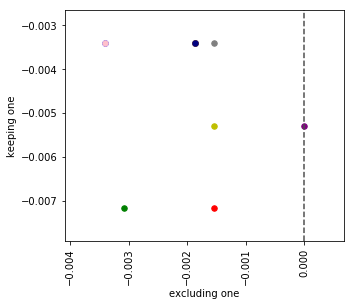

	head	ablating	keeping
	0	-0.00155 	-0.00717
	1	-0.00309 	-0.00717
	2	-0.00341 	-0.00341
	3	-0.00155 	-0.00529
	4	-0.00187 	-0.00341
	5	-0.00187 	-0.00341
	6	-0.00187 	-0.00341
	7	-0.00155 	-0.00341
	8	-0.00187 	-0.00341
	9	-0.00000 	-0.00529
	10	-0.00187 	-0.00341
	11	-0.00341 	-0.00341
	avg	-0.00199 	-0.00435


< LAYER 11 >


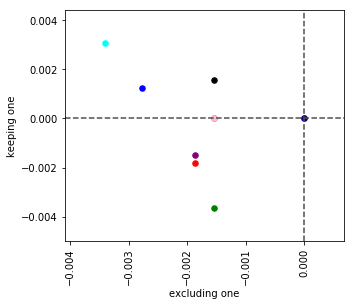

	head	ablating	keeping
	0	-0.00187 	-0.00181
	1	-0.00155 	-0.00365
	2	-0.00277 	0.00124
	3	-0.00155 	0.00002
	4	-0.00341 	0.00307
	5	-0.00155 	0.00002
	6	-0.00155 	0.00155
	7	-0.00000 	0.00002
	8	-0.00000 	0.00002
	9	-0.00187 	-0.00150
	10	-0.00000 	0.00002
	11	-0.00155 	0.00002
	avg	-0.00147 	-0.00008


In [22]:
all_exclude_relations = []
all_keep_relations = []

for layer_ind in range(num_layer):
    print(f"\n\n< LAYER {layer_ind} >")
#     display_plot(f"../head_distributions/{dataset}/attn-l{layer_ind}-heads.png")
    
    excluding_diffs = []
    keep_diffs = []

    for head_ind in range(num_heads):
        log_ind_base = (num_heads*layer_ind) + head_ind
        ablated_acc = float(c1_acc[log_ind_base])
        ablate_one_diff = round(ablated_acc - base_acc, 5)
        
        reverse_acc = float(c11_acc[log_ind_base])
        reverse_diff = round(reverse_acc - base_acc, 5)
        
        excluding_diffs.append(ablate_one_diff)
        keep_diffs.append(reverse_diff)
        
    plot_head_relation(excluding_diffs, keep_diffs)
    
    all_exclude_relations.append(excluding_diffs)
    all_keep_relations.append(keep_diffs)
    
    print("\thead\tablating\tkeeping")
    for ind, (ablate_one_diff, reverse_diff) in enumerate(zip(excluding_diffs, keep_diffs)):
        print('\t{0}\t{1:.5f} \t{2:.5f}'.format(ind, ablate_one_diff, reverse_diff))
        
    print('\t{0}\t{1:.5f} \t{2:.5f}'.format("avg", np.mean(excluding_diffs), np.mean(keep_diffs)))


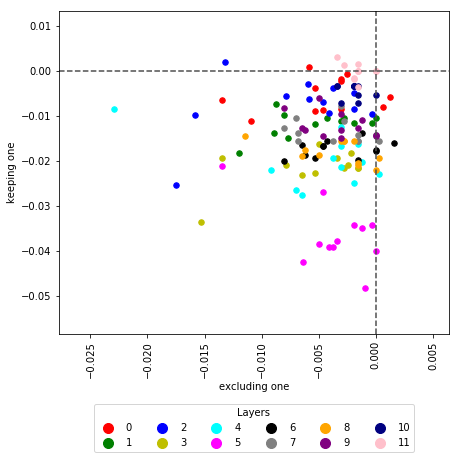

In [23]:
plot_all_relation(all_exclude_relations, all_keep_relations)

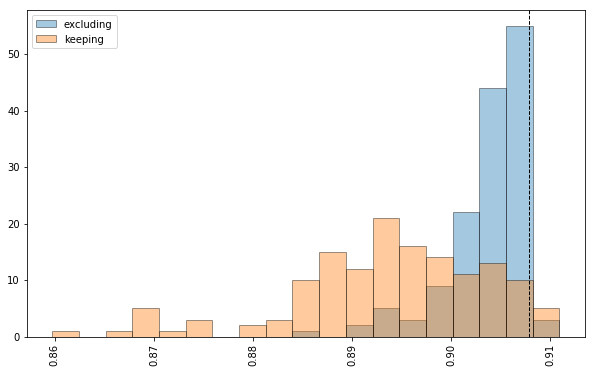

In [24]:
fig = plt.gcf()
fig.set_size_inches(10, 6)

num_bins = 20

reported_acc = np.array(c1_acc, dtype=float)
reported_acc = np.around(reported_acc, 5)

reported_reverse_acc = np.array(c11_acc[1:], dtype=float)
reported_reverse_acc = np.around(reported_reverse_acc, 5)

bins = np.linspace(min(reported_acc.min(), reported_reverse_acc.min()), max(reported_acc.max(), reported_reverse_acc.max()), num_bins)

plt.hist(reported_acc, bins, edgecolor='k', alpha=0.4, label='excluding')
plt.hist(reported_reverse_acc, bins, edgecolor='k', alpha=0.4, label='keeping')
plt.axvline(base_acc, color='k', linestyle='dashed', linewidth=1)
plt.xticks(rotation=90)
plt.legend(loc='upper left')
plt.show()


## 2. removing two heads

In [25]:
c2_acc_map = {}

for entry in c2_acc:
    mask, acc = entry.split()
    layer, heads = mask.split(':')
    
    layer = int(layer)-1
    
    if layer not in c2_acc_map:
        c2_acc_map[layer] = {}
        
    head_one, head_two = heads.split(',')
    new_head_key = str(int(head_one) -1) + "," + str(int(head_two) -1)
        
    c2_acc_map[layer][new_head_key] = round(float(acc) - base_acc, 5)

In [26]:
c2_tables = []

head_labels = list(range(1, num_heads))
head_labels.insert(0, " ")
head_labels = list(map(str, head_labels))

counter = 0

for layer_ind in range(num_layer):
#     print(f'< layer {layer_ind} >')
    c2_tables.append(PrettyTable(head_labels))
    for head_ind_1 in range(num_heads-1):
        accs = [str(head_ind_1)]
        for head_ind_2 in range(1, num_heads):
            if head_ind_2 <= head_ind_1:
                accs.append('-')
            else:
                key = str(head_ind_1) + ',' + str(head_ind_2)
                
                val = c2_acc_map[layer_ind][key]
                
                msg = str(round(val, 4))
                
                if val > 0:
                    msg = wrap_green(msg)
                elif val < 0:
                    msg = wrap_red(msg)
                
                accs.append(msg)
#                 accs.append(str(round(c2_acc_map[layer_ind][key] * 100, 2)))
            
                counter += 1
        c2_tables[-1].add_row(accs)
#     print(tables[-1])


## 2. removing two heads

In [27]:
c10_acc_map = {}

for entry in c10_acc:
    mask, acc = entry.split()
    layer, heads = mask.split(':')
    
    layer = int(layer)-1
    
    if layer not in c10_acc_map:
        c10_acc_map[layer] = {}
        
    head_one, head_two = heads.split(',')
    new_head_key = str(int(head_one) -1) + "," + str(int(head_two) -1)
        
    c10_acc_map[layer][new_head_key] = round(float(acc) - base_acc, 5)
#     c10_acc_map[layer][new_head_key] = round(float(acc), 5)

In [28]:
c10_tables = []

head_labels = list(range(1, num_heads))
head_labels.insert(0, " ")
head_labels = list(map(str, head_labels))

counter = 0

for layer_ind in range(num_layer):
#     print(f'< layer {layer_ind} >')
    c10_tables.append(PrettyTable(head_labels))
    for head_ind_1 in range(num_heads-1):
        accs = [str(head_ind_1)]
        for head_ind_2 in range(1, num_heads):
            if head_ind_2 <= head_ind_1:
                accs.append('-')
            else:
                key = str(head_ind_1) + ',' + str(head_ind_2)
                
                val = c10_acc_map[layer_ind][key]
                
                msg = str(round(val, 4))
                
                if val > 0:
                    msg = wrap_green(msg)
                elif val < 0:
                    msg = wrap_red(msg)
                
                accs.append(msg)
                
                counter += 1
        c10_tables[-1].add_row(accs)
#     print(c10_tables[-1])


In [29]:
for head_ind in range(num_heads):
    log_ind_base = (num_heads*layer_ind) + head_ind
    ablated_acc = float(c1_acc[log_ind_base])
    ablate_one_diff = round(ablated_acc - base_acc, 5)

    reverse_acc = float(c11_acc[log_ind_base])
    reverse_diff = round(reverse_acc - base_acc, 5)

    excluding_diffs.append(ablate_one_diff)
    keep_diffs.append(reverse_diff)


for layer_ind in range(num_layer):
    print(f'\n -------- < layer {layer_ind} > -------- base : ', base_acc)
    
    print_bold("11 heads (drop 1)")
    for head_ind in range(num_heads):
        log_ind_base = (num_heads*layer_ind) + head_ind
        ablated_acc = float(c1_acc[log_ind_base])
        ablate_one_diff = round(ablated_acc - base_acc, 5)
        print(head_ind, '\t', up_down_str(ablate_one_diff))
    
    print_bold("\n10 heads (drop 2)")
    print(c2_tables[layer_ind])
    print_bold("\n2 heads (drop 10)")
    print(c10_tables[layer_ind])
    print_bold("\n1 heads (drop 11)")
    for head_ind in range(num_heads):
        log_ind_base = (num_heads*layer_ind) + head_ind
        reverse_acc = float(c11_acc[log_ind_base])
        reverse_diff = round(reverse_acc - base_acc, 5)
        print(head_ind, '\t', up_down_str(reverse_diff))
    
    masked_all_acc = float(masked_acc[layer_ind].split()[2])
    masked_diff = round(masked_all_acc - base_acc, 5)
    
    print_bold("\ndrop all heads", up_down_str(masked_diff))


 -------- < layer 0 > -------- base :  0.90785

11 heads (drop 1)

0 	 -0.00309
1 	 0.00062
2 	 -0.00529
3 	 -0.00529
4 	 -0.01094
5 	 -0.00251
6 	 -0.00462
7 	 0.00124
8 	 -0.01348
9 	 -0.00309
10 	 -0.00582
11 	 -0.00309


10 heads (drop 2)

+----+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+
|    |    1    |    2    |    3    |    4    |    5    |    6    |    7    |    8    |    9    |    10   |    11   |
+----+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+
| 0  | -0.0075 | -0.0075 | -0.0094 | -0.0091 | -0.0136 | -0.0102 | -0.0075 | -0.0158 |  -0.005 | -0.0109 | -0.0075 |
| 1  |    -    | -0.0105 | -0.0092 | -0.0117 | -0.0131 | -0.0075 | -0.0082 | -0.0114 |  -0.006 | -0.0105 | -0.0082 |
| 2  |    -    |    -    | -0.0105 | -0.0117 |  -0.01  | -0.0078 | -0.0105 | -0.0126 | -0.0044 | -0.0082 | -0.0124 |
| 3  |    -    |    -    |    -    |  -0.007 | -0.015

## 3. keeping only two heads for each layer

# Variance Study

    Difference in the amount of variance explained by the two components from PCA
    
    1. calculate variance explained for each heads (12 layers * 12 heads * 2 components)
    2. for each pair, compute the difference
    3. compute average for each layer
    
    numbers in bracket is difference in the (aggregated - 2 componenets) percentage of variance explained 
    

- layer 0 : -0.009700178169 ( -0.004618635401 )
- layer 1 : -0.002130121148 ( -0.01102727962 )
- layer 2 : -0.0005090703877 ( -0.008767988533 )
- layer 3 : -0.008532019642 ( -0.0001414188494 )
- layer 4 : -0.01443783442 ( 0.01288391898 )
- layer 5 : -0.006370164144 ( 0.009677752232 )
- layer 6 : -0.02571878924 ( -0.007680003531 )
- layer 7 : -0.001414982602 ( -0.01829779334 )
- layer 8 : 0.1295127854 ( 0.05322728865 )
- layer 9 : 0.3625547122 ( 0.1430218257 )
- layer 10 : 0.7758189954 ( 0.3924566129 )
- layer 11 : 1.779233397 ( 0.5672445898 )